# Question 3
## What is the most popular type of wine?

In [1]:
# Imports
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.model_selection import GridSearchCV
import numpy as np
import pprint as pp
import matplotlib.pyplot as plt

red_wine = pd.read_csv('../data/winequality-red.csv', delimiter=';')
white_wine = pd.read_csv('../data/winequality-white.csv', delimiter=';')

### What does type mean? 
In this case, type means grouping of feature values that are markedly different from other groupings of feature values. 

I will perform a cluster analysis, and then determine which cluster has sold the most (using the definition of popular that is the wines which people have bought the most). 

The expert's quality scores will be removed, as they were not available to the public buyers when they were buying the wines. 

## Which is the most popular type of red wine?

In [2]:
red_wine_data = red_wine.iloc[:,:-1]
red_wine_feature_names = red_wine_data.columns

param_grid = {'n_clusters':np.arange(1,16)}
red_grid_search_cv = GridSearchCV(KMeans(), param_grid)
red_grid_search_cv.fit(red_wine_data)
pp.pprint(red_grid_search_cv.grid_scores_)

[mean: -648320.27551, std: 46904.29707, params: {'n_clusters': 1},
 mean: -237074.29498, std: 34911.66299, params: {'n_clusters': 2},
 mean: -136752.39482, std: 28775.44275, params: {'n_clusters': 3},
 mean: -103286.10549, std: 25795.42314, params: {'n_clusters': 4},
 mean: -88948.23388, std: 16339.46546, params: {'n_clusters': 5},
 mean: -75429.27504, std: 19449.68654, params: {'n_clusters': 6},
 mean: -65764.42903, std: 20129.75733, params: {'n_clusters': 7},
 mean: -60597.54190, std: 20386.27200, params: {'n_clusters': 8},
 mean: -55568.83198, std: 18874.04521, params: {'n_clusters': 9},
 mean: -50512.00357, std: 21366.93370, params: {'n_clusters': 10},
 mean: -46744.91642, std: 19410.58931, params: {'n_clusters': 11},
 mean: -44117.97042, std: 18749.56656, params: {'n_clusters': 12},
 mean: -43148.41215, std: 18279.76628, params: {'n_clusters': 13},
 mean: -41584.95510, std: 17867.06408, params: {'n_clusters': 14},
 mean: -40552.71458, std: 17463.44816, params: {'n_clusters': 15}]


/home/chhk/.local/lib/python3.6/site-packages/sklearn/model_selection/_search.py:762: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


/home/chhk/.local/lib/python3.6/site-packages/sklearn/model_selection/_search.py:762: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


AxesSubplot(0.125,0.125;0.775x0.755)


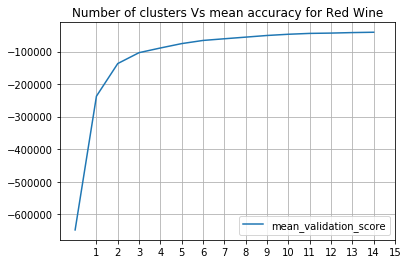

In [3]:
rdf = pd.DataFrame(data=red_grid_search_cv.grid_scores_)

x_ticks = []
for i in rdf.parameters.values:
    x_ticks.append(i['n_clusters'])

print(rdf.plot.line(title='Number of clusters Vs mean accuracy for Red Wine', 
                    grid=True, 
                   xticks=(x_ticks)))

The above graph shows that a good number for k for the red wine dataset is ~3. 

In [4]:
red_kmeans = KMeans(n_clusters=3)
red_kmeans.fit(red_wine_data)
print(red_kmeans.score(red_wine_data))
red_cluster_centres = pd.DataFrame(data=red_kmeans.cluster_centers_, columns=red_wine_feature_names)
red_cluster_centres

-395309.1834555976


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,8.286996,0.520504,0.272436,2.497070,0.091310,21.570513,54.888278,0.996856,3.320201,0.677106,10.376801
1,7.887552,0.572365,0.275643,3.232365,0.088398,26.151452,108.506224,0.996935,3.289627,0.652033,10.008921
2,8.469828,0.519520,0.268608,2.361022,0.084606,8.995074,22.392857,0.996618,3.311379,0.647217,10.576929


(0.0, 1.0, 0.0, 1.0)

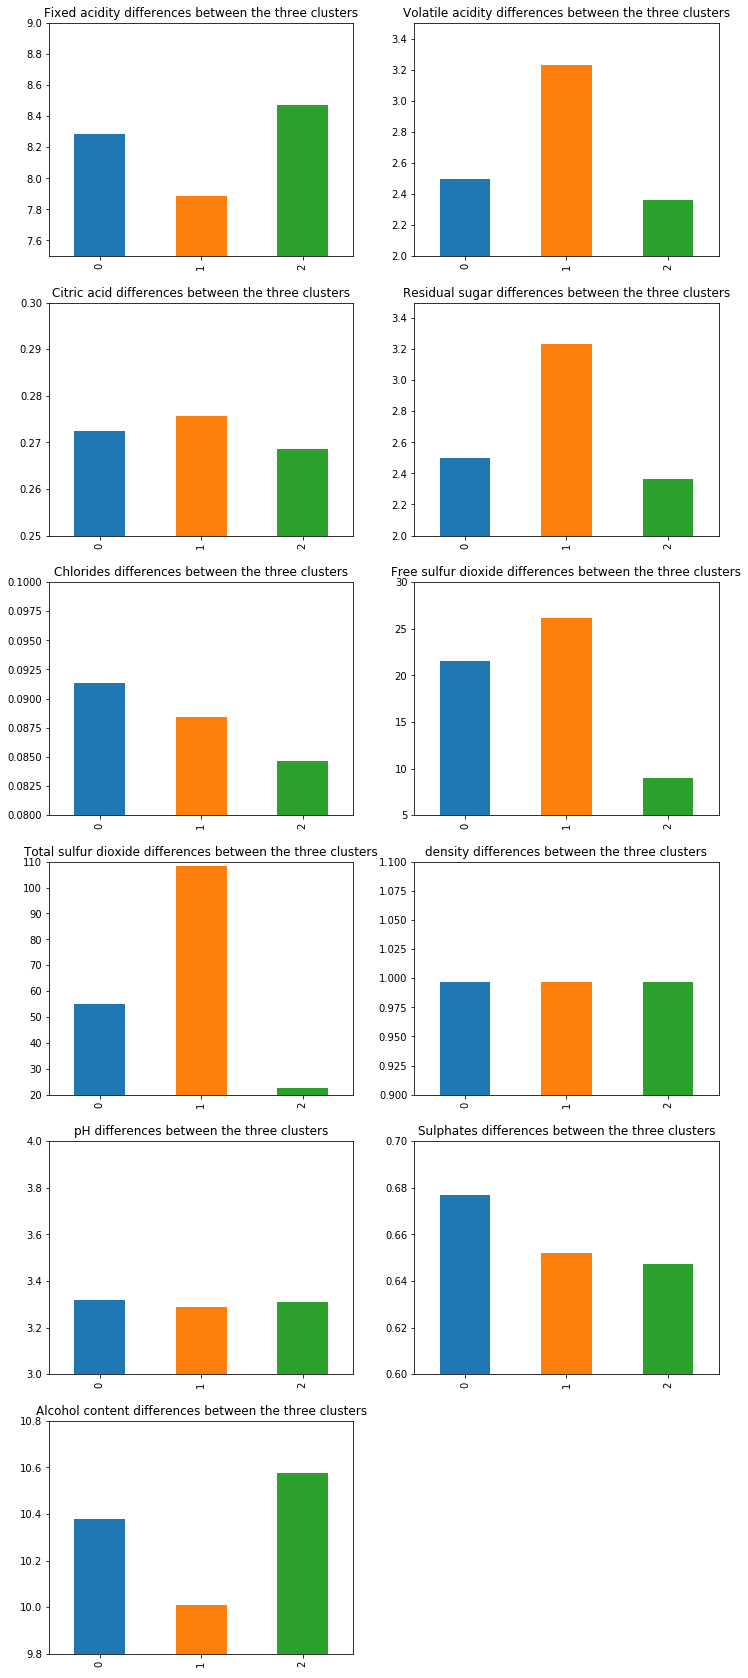

In [17]:
fig1, axarr1 = plt.subplots(6, 2, figsize=(12,30))

fixed_acidity_bar = red_cluster_centres['fixed acidity'].plot.bar(
    title='Fixed acidity differences between the three clusters', 
    ylim=(7.5,9),
    ax=axarr1[0][0])

volatile_acidity_bar = red_cluster_centres['residual sugar'].plot.bar(
    title='Volatile acidity differences between the three clusters', 
    ylim=(2,3.5),
    ax=axarr1[0][1])

citric_acid_bar = red_cluster_centres['citric acid'].plot.bar(
    title='Citric acid differences between the three clusters', 
    ylim=(0.25,0.3),
    ax=axarr1[1][0])

residual_sugar_bar = red_cluster_centres['residual sugar'].plot.bar(
    title='Residual sugar differences between the three clusters', 
    ylim=(2,3.5),
    ax=axarr1[1][1])

chlorides_bar = red_cluster_centres['chlorides'].plot.bar(
    title='Chlorides differences between the three clusters', 
    ylim=(0.08,0.1),
    ax=axarr1[2][0])

free_sulfur_dioxide_bar = red_cluster_centres['free sulfur dioxide'].plot.bar(
    title='Free sulfur dioxide differences between the three clusters', 
    ylim=(5,30),
    ax=axarr1[2][1])

total_sulful_dioxide_bar = red_cluster_centres['total sulfur dioxide'].plot.bar(
    title='Total sulfur dioxide differences between the three clusters', 
    ylim=(20,110),
    ax=axarr1[3][0])

density_bar = red_cluster_centres['density'].plot.bar(
    title='density differences between the three clusters', 
    ylim=(0.9,1.1),
    ax=axarr1[3][1])

pH_bar = red_cluster_centres['pH'].plot.bar(
    title='pH differences between the three clusters', 
    ylim=(3,4),
    ax=axarr1[4][0])

sulphates_bar = red_cluster_centres['sulphates'].plot.bar(
    title='Sulphates differences between the three clusters', 
    ylim=(0.6,0.7),
    ax=axarr1[4][1])

alcohol_bar = red_cluster_centres['alcohol'].plot.bar(
    title='Alcohol content differences between the three clusters', 
    ylim=(9.8,10.8), 
    ax=axarr1[5][0])

axarr1[5][1].axis('off')